In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from tensorflow.keras import datasets, layers, models, optimizers
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.utils import to_categorical
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

170498071/170498071 [==============================] - 5s 0us/step
Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
name_list = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

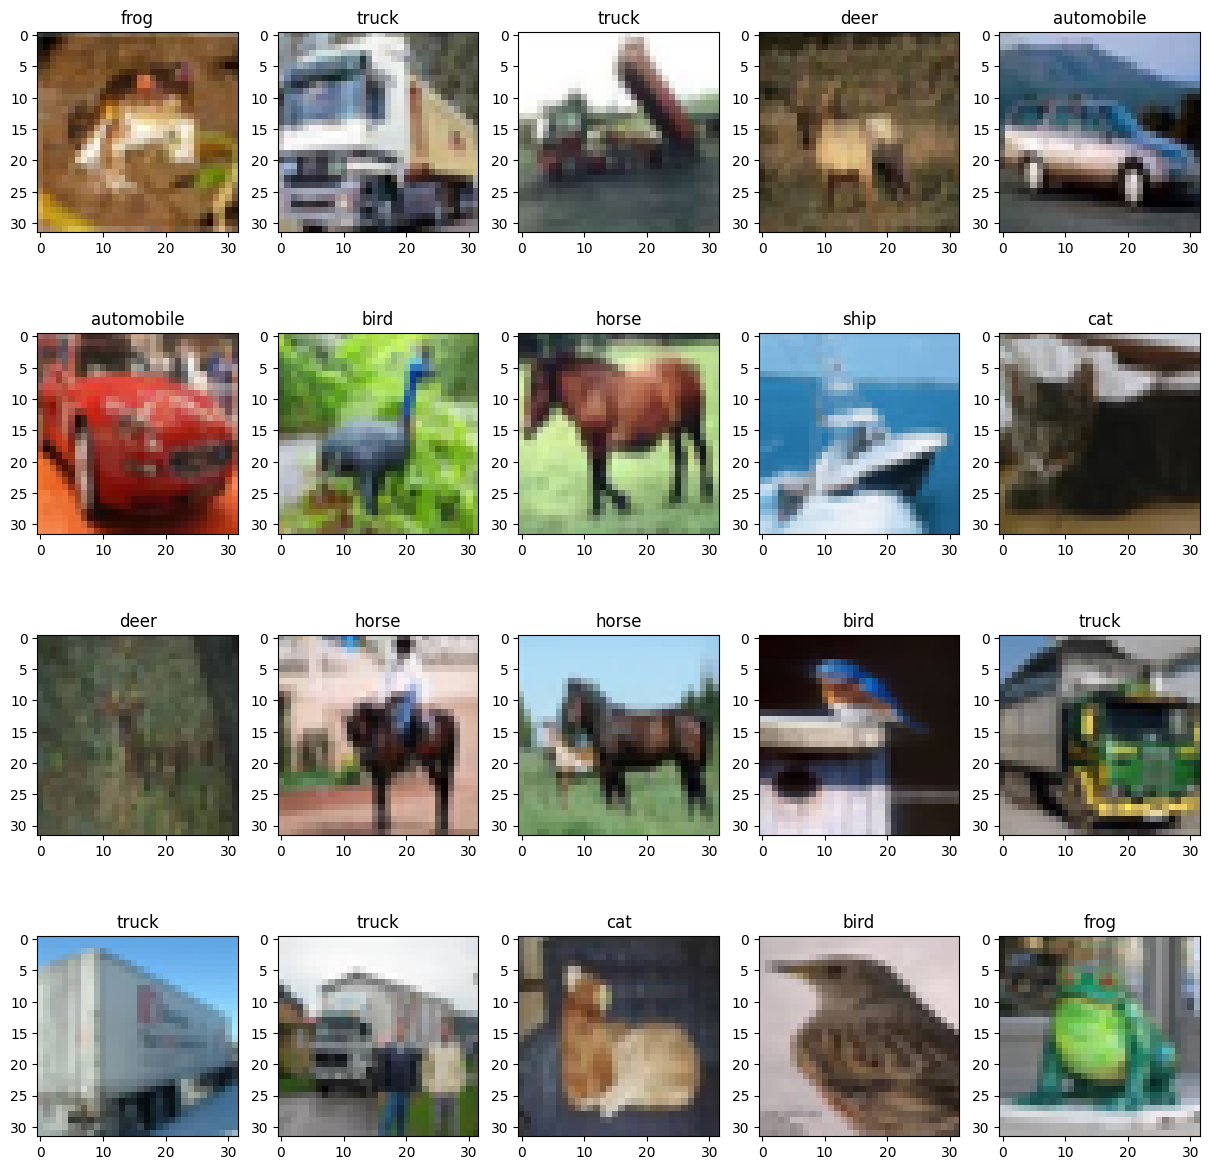

In [ ]:
plt.figure(figsize = (15,15)) # Adjusting figure size
for i in range(20):
  plt.subplot(4,5, i+1)
  plt.title(name_list[y_train[i][0]])
  plt.imshow(X_train[i])

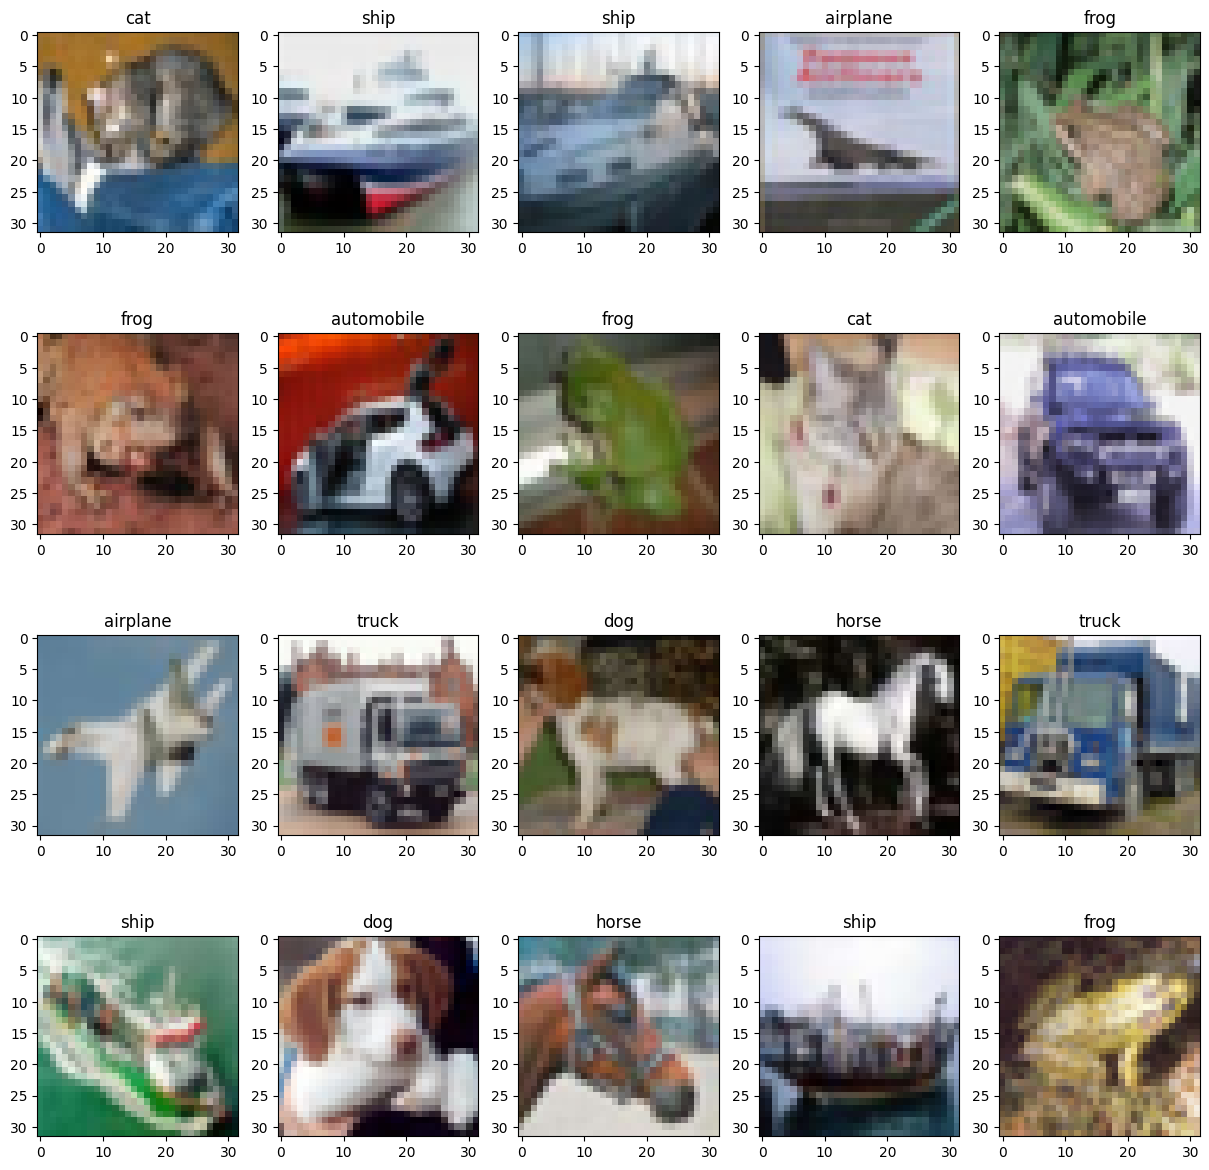

In [ ]:
plt.figure(figsize = (15,15)) # Adjusting figure size
for i in range(20):
  plt.subplot(4,5, i+1)
  plt.title(name_list[y_test[i][0]])
  plt.imshow(X_test[i])

In [ ]:
def define_model():
  # building model sequential
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))


  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.3))
  model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.3))

  # flatten
  model.add(Flatten())

  # Feed foward neural network
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  opt = optimizers.Adam()
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

  return model

In [ ]:
acc_per_fold = []
loss_per_fold = []
inputs = np.vstack((X_train, X_test))
targets = np.vstack((Y_train, Y_test))
kfold = KFold(n_splits=6, shuffle=False)
current_fold_num = 1
for train_index, test_index in kfold.split(inputs):
  print("TRAIN:", train_index, "TEST:", test_index)
  X, XT = inputs[train_index], inputs[test_index]
  Y, YT = targets[train_index], targets[test_index]
  #base model
  base_model = define_model()
  # early stop
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
  history = base_model.fit(X, Y, epochs=100, batch_size=64, validation_data=(XT, YT), callbacks=[es])
  scores = base_model.evaluate(XT, YT)
  print(f"Scores for {current_fold_num}: ", scores[1]*100)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  current_fold_num +=1

TRAIN: [10000 10001 10002 ... 59997 59998 59999] TEST: [   0    1    2 ... 9997 9998 9999]
Epoch 1/100
782/782 [==============================] - 23s 17ms/step - loss: 1.8253 - accuracy: 0.3689 - val_loss: 1.5500 - val_accuracy: 0.4355
Epoch 2/100
782/782 [==============================] - 11s 14ms/step - loss: 1.2719 - accuracy: 0.5403 - val_loss: 1.1630 - val_accuracy: 0.5622
Epoch 3/100
782/782 [==============================] - 11s 13ms/step - loss: 1.0681 - accuracy: 0.6178 - val_loss: 0.8872 - val_accuracy: 0.6822
Epoch 4/100
782/782 [==============================] - 11s 14ms/step - loss: 0.9388 - accuracy: 0.6679 - val_loss: 0.9237 - val_accuracy: 0.6772
Epoch 5/100
782/782 [==============================] - 10s 13ms/step - loss: 0.8473 - accuracy: 0.7061 - val_loss: 0.7050 - val_accuracy: 0.7512
Epoch 6/100
782/782 [==============================] - 11s 14ms/step - loss: 0.7687 - accuracy: 0.7336 - val_loss: 0.6367 - val_accuracy: 0.7759
Epoch 7/100
782/782 [==================

<ipython-input-9-8cd40f918f9a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


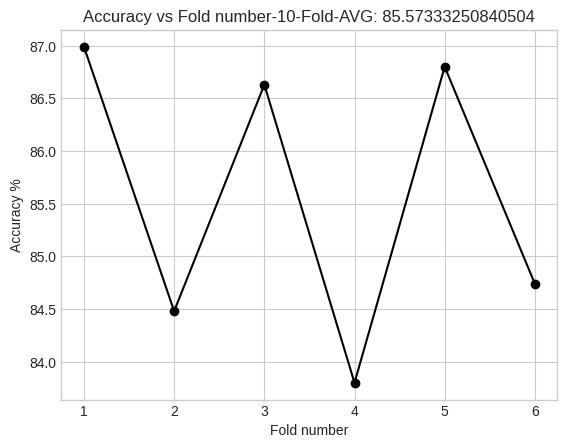

<ipython-input-9-8cd40f918f9a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


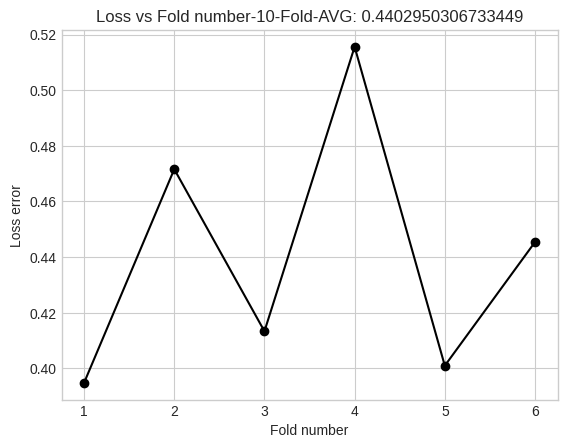

In [ ]:
x = np.linspace(1, 6, 6)
plt.style.use('seaborn-whitegrid')
plt.plot(x, acc_per_fold, '-ok')
plt.xlabel("Fold number")
plt.ylabel("Accuracy %")
plt.title(f"Accuracy vs Fold number-10-Fold-AVG: {np.average(acc_per_fold)}")
plt.show()

plt.style.use('seaborn-whitegrid')
plt.plot(x, loss_per_fold, '-ok')
plt.xlabel("Fold number")
plt.ylabel("Loss error")
plt.title(f"Loss vs Fold number-10-Fold-AVG: {np.average(loss_per_fold)}")
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_42 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_43 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

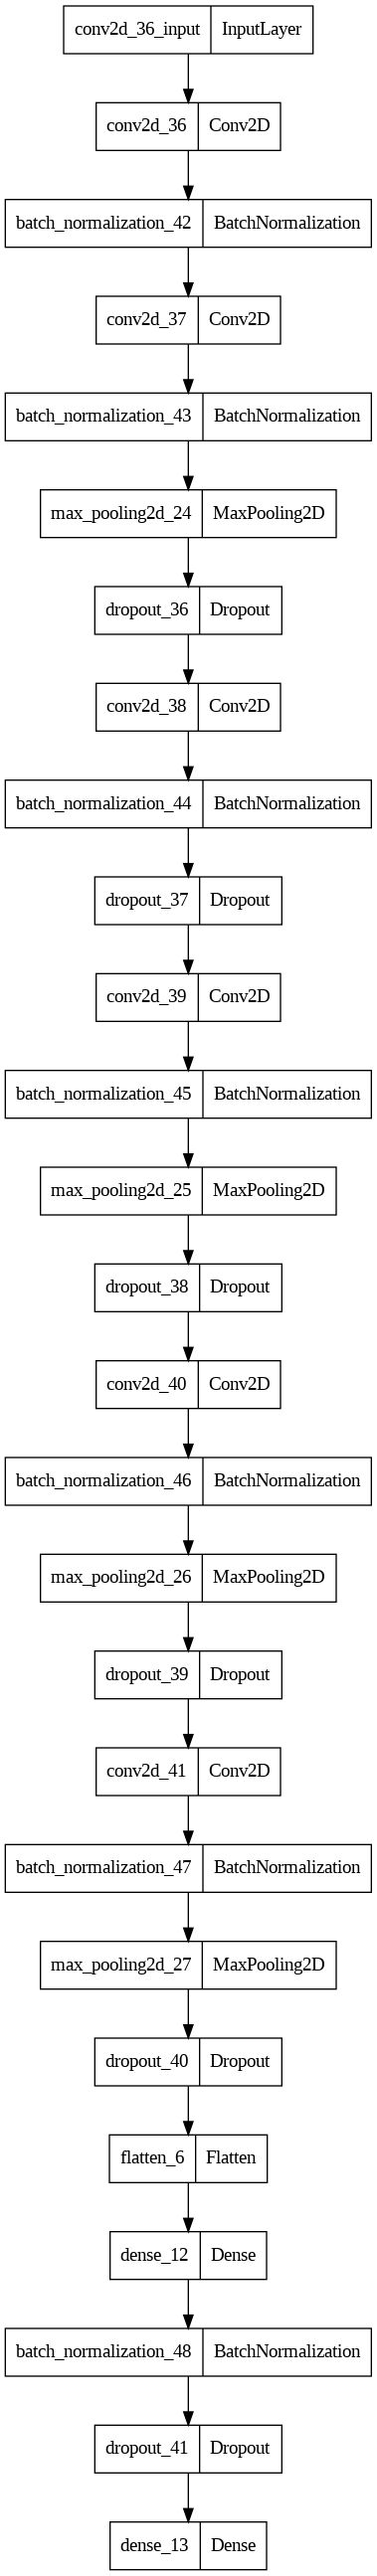

In [ ]:
# create base model
base_model = define_model()
base_model.summary()
plot_model(base_model)

In [ ]:
# early stop
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
# training model
history = base_model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), callbacks=[es])

Epoch 1/100
782/782 [==============================] - 15s 14ms/step - loss: 1.8030 - accuracy: 0.3800 - val_loss: 1.6371 - val_accuracy: 0.4337
Epoch 2/100
782/782 [==============================] - 11s 13ms/step - loss: 1.2629 - accuracy: 0.5468 - val_loss: 1.0710 - val_accuracy: 0.6177
Epoch 3/100
782/782 [==============================] - 11s 14ms/step - loss: 1.0696 - accuracy: 0.6200 - val_loss: 0.9501 - val_accuracy: 0.6600
Epoch 4/100
782/782 [==============================] - 11s 14ms/step - loss: 0.9490 - accuracy: 0.6655 - val_loss: 0.8687 - val_accuracy: 0.6924
Epoch 5/100
782/782 [==============================] - 11s 14ms/step - loss: 0.8437 - accuracy: 0.7062 - val_loss: 0.7990 - val_accuracy: 0.7221
Epoch 6/100
782/782 [==============================] - 10s 13ms/step - loss: 0.7763 - accuracy: 0.7335 - val_loss: 0.6971 - val_accuracy: 0.7539
Epoch 7/100
782/782 [==============================] - 11s 13ms/step - loss: 0.7185 - accuracy: 0.7513 - val_loss: 0.6274 - val_ac

In [ ]:
result = base_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4239 - accuracy: 0.8665


In [ ]:
base_model.save('/content/drive/MyDrive/base_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


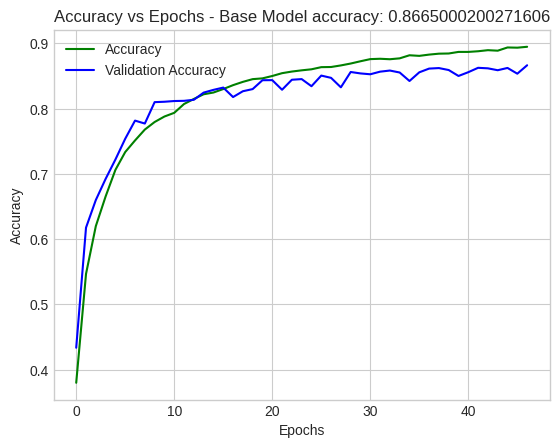

In [ ]:
# fig = plt.figure()
plt.plot(history.history['accuracy'], 'g', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title(f"Accuracy vs Epochs - Base Model accuracy: {result[1]}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/base-model")
plt.show()